# Extract ROIs
- ref_create_anatomical_mask.ipynb 참고 
- Brainnetome Atlas 사용
- https://atlas.brainnetome.org/

In [1]:
import os
import glob
import nibabel as nib
import pandas as pd
import numpy as np
import json

from nilearn import image, plotting, masking
from nilearn.input_data import NiftiLabelsMasker, NiftiMasker

from bids import BIDSLayout, BIDSValidator

base_dir = '/mnt/c/Users/since/Desktop/KdramaMay/'
mask_dir = os.path.join(base_dir, 'analysis', 'Masks')
atlas_path = os.path.join(base_dir,'analysis','BN_atlas')

atlas_filename = os.path.join(atlas_path,'BN_Atlas_246_2mm.nii.gz')
label_filename = os.path.join(atlas_path,'BN_Atlas_246_LUT.txt')

# read look-up-table and images
master_label = pd.read_csv(label_filename, sep=' ', names = ['index','region','dx','dy','dz','dummy']).reset_index(drop = True)
master_atlas = image.load_img(atlas_filename)

/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.7 support is deprecated and will be removed in release 0.12 of Nilearn. Consider switching to Python 3.9 or 3.10.
  _python_deprecation_warnings()
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [2]:
mask_dir = os.path.join(base_dir, 'analysis', 'Masks')
mask_file = os.path.join(mask_dir, 'MNI152NLin2009cAsym_mask.nii.gz')

mask_image = image.load_img(mask_file) # this file for affine information
master_atlas = image.resample_to_img(master_atlas,mask_image) # transform affine for master atlas

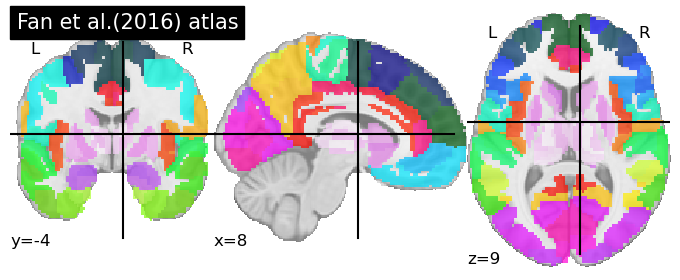

In [4]:
plotting.plot_roi(master_atlas, title='Fan et al.(2016) atlas', cut_coords=(8, -4, 9))

## HPC

In [217]:
# get index of hippocampus (cHipp_R, rHipp_R, cHipp_L, rHipp_L)

set_label = master_label[(master_label['region'] == 'cHipp_R') | 
                         (master_label['region'] == 'rHipp_R') |
                         (master_label['region'] == 'cHipp_L') |
                         (master_label['region'] == 'rHipp_L')].index 
set_label

Int64Index([215, 216, 217, 218], dtype='int64')

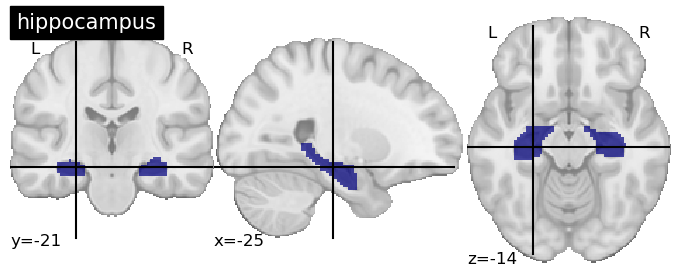

In [218]:
# ROI mask from atlas
brain_roi = image.math_img('img*0', img = master_atlas)
for index in set_label:
    brain_roi = image.math_img('np.logical_or(img0, img1 == %s)' %(index), img0 = brain_roi, img1 = master_atlas) # ROI mask from atlas

plotting.plot_roi(brain_roi,title='hippocampus')

In [219]:
# save brain mask
output_name = os.path.join(base_dir,'analysis','Masks', 'BN_2mm_hippocampus_mask_.nii.gz' )
nib.save(brain_roi, output_name)

## precuneus 
- which is similar to TPJ/PCC? areas in the Neurosynth

In [214]:
set_label = master_label[(master_label['region'] == 'A7m_L') | 
                         (master_label['region'] == 'A7m_R') |
                         (master_label['region'] == 'A5m_L') |
                         (master_label['region'] == 'A5m_R') |
                         (master_label['region'] == 'dmPOS_L') |
                         (master_label['region'] == 'dmPOS_R') |
                         (master_label['region'] == 'A31_L') |
                         (master_label['region'] == 'A31_R')].index 
set_label

Int64Index([147, 148, 149, 150, 151, 152, 153, 154], dtype='int64')

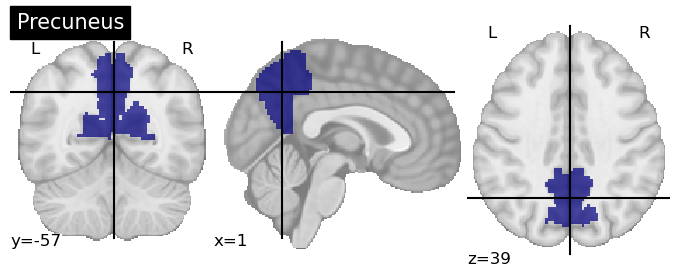

In [215]:
# ROI mask from atlas
brain_roi = image.math_img('img*0', img = master_atlas)
for index in set_label:
    brain_roi = image.math_img('np.logical_or(img0, img1 == %s)' %(index), img0 = brain_roi, img1 = master_atlas) # ROI mask from atlas

plotting.plot_roi(brain_roi,title='Precuneus')

In [216]:
# save brain mask
output_name = os.path.join(base_dir,'analysis','Masks', 'BN_2mm_precuneus_mask_.nii.gz' )
nib.save(brain_roi, output_name)

## PCC
- which is located in the Limbic Lobe - CG, Cingluate Gyrus

In [196]:
set_label = master_label[(master_label['region'] == 'A23d_L') | 
                         (master_label['region'] == 'A23d_R') |
                         (master_label['region'] == 'A23v_L') |
                         (master_label['region'] == 'A23v_R') |
                         (master_label['region'] == 'A39rv_L') |
                         (master_label['region'] == 'A39rv_R') |
                         # (master_label['region'] == 'A23c_L') |
                         # (master_label['region'] == 'A23c_R')|
                         (master_label['region'] == 'A31_L') |
                         (master_label['region'] == 'A31_R') ].index 
                         
set_label

Int64Index([143, 144, 153, 154, 175, 176, 181, 182], dtype='int64')

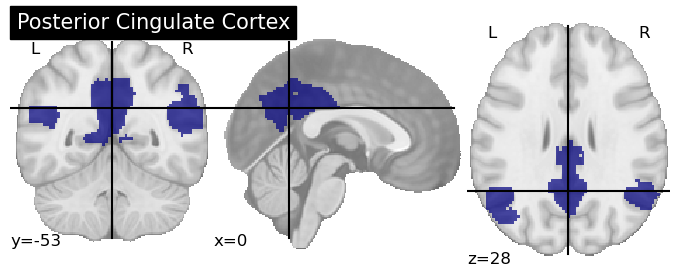

In [197]:
# ROI mask from atlas
brain_roi = image.math_img('img*0', img = master_atlas)
for index in set_label:
    brain_roi = image.math_img('np.logical_or(img0, img1 == %s)' %(index), img0 = brain_roi, img1 = master_atlas) # ROI mask from atlas

plotting.plot_roi(brain_roi,title='Posterior Cingulate Cortex', cut_coords=(0, -53, 28))

In [198]:
# save brain mask
output_name = os.path.join(base_dir,'analysis','Masks', 'BN_2mm_pcc_mask_.nii.gz' )
nib.save(brain_roi, output_name)

## vmPFC

In [211]:
# get index of hippocampus (cHipp_R, rHipp_R, cHipp_L, rHipp_L)

set_label = master_label[(master_label['region'] == 'A14m_L') |
                         (master_label['region'] == 'A14m_R') |
                         (master_label['region'] == 'A32sg_L') | # anterior CC
                         (master_label['region'] == 'A32sg_R') | # anterior CC
                         # (master_label['region'] == 'A10m_L') |
                         # (master_label['region'] == 'A10m_R') |
                         (master_label['region'] == 'A11m_L') |
                         (master_label['region'] == 'A11m_R') |
                         (master_label['region'] == 'A13_L') |
                         (master_label['region'] == 'A13_R')].index 
set_label

Int64Index([41, 42, 47, 48, 49, 50, 187, 188], dtype='int64')

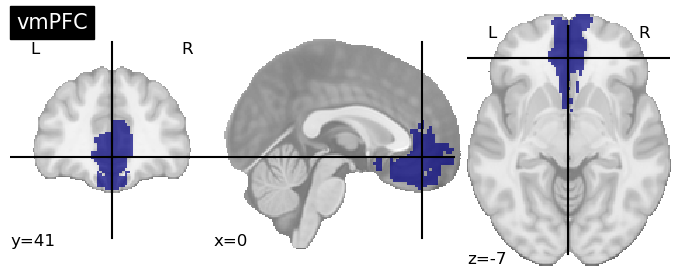

In [212]:
# ROI mask from atlas
brain_roi = image.math_img('img*0', img = master_atlas)
for index in set_label:
    brain_roi = image.math_img('np.logical_or(img0, img1 == %s)' %(index), img0 = brain_roi, img1 = master_atlas) # ROI mask from atlas

plotting.plot_roi(brain_roi,title='vmPFC', cut_coords=(0, 41, -7))

In [213]:
# save brain mask
output_name = os.path.join(base_dir,'analysis','Masks', 'BN_2mm_vmPFC_mask_.nii.gz' )
nib.save(brain_roi, output_name)

## TPJ 
- which areas are similar to TPJ in Neurosynth 

In [207]:
# get index of hippocampus (cHipp_R, rHipp_R, cHipp_L, rHipp_L)

set_label = master_label[(master_label['region'] == 'cpSTS_L') | #posterior Superior Temporal Sulcus
                         (master_label['region'] == 'cpSTS_R') | #posterior Superior Temporal Sulcus
                         (master_label['region'] == 'rpSTS_L') | #posterior Superior Temporal Sulcus
                         (master_label['region'] == 'rpSTS_R') | #posterior Superior Temporal Sulcus
                         (master_label['region'] == 'A37dl_L') | #Middle Temporal Gyrus
                         (master_label['region'] == 'A37dl_R') ].index #Middle Temporal Gyrus
                         #(master_label['region'] == 'aSTS_L') | #inferior Parietal Lobule
                         #(master_label['region'] == 'aSTS_R') ].index #inferior Parietal Lobule 
                         #(master_label['region'] == 'A40rv_L') |
                         #(master_label['region'] == 'A40rv_R')]
set_label

Int64Index([85, 86, 121, 122, 123, 124], dtype='int64')

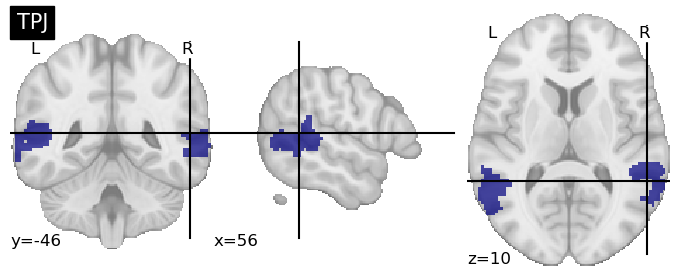

In [209]:
# ROI mask from atlas
brain_roi = image.math_img('img*0', img = master_atlas)
for index in set_label:
    brain_roi = image.math_img('np.logical_or(img0, img1 == %s)' %(index), img0 = brain_roi, img1 = master_atlas) # ROI mask from atlas

plotting.plot_roi(brain_roi,title='TPJ', cut_coords=(56, -46, 10))

In [210]:
# save brain mask
output_name = os.path.join(base_dir,'analysis','Masks', 'BN_2mm_tpj_mask_.nii.gz' )
nib.save(brain_roi, output_name)

## BG

In [24]:
# get index of hippocampus (cHipp_R, rHipp_R, cHipp_L, rHipp_L)

set_label = master_label[(master_label['region'] == 'vCa_L') | 
                         (master_label['region'] == 'vCa_R') |
                         (master_label['region'] == 'GP_L') | 
                         (master_label['region'] == 'GP_R') |
                         (master_label['region'] == 'NAC_L') | 
                         (master_label['region'] == 'NAC_R') |
                         (master_label['region'] == 'vmPu_L') | 
                         (master_label['region'] == 'vmPu_R') |
                         (master_label['region'] == 'dCa_L') | 
                         (master_label['region'] == 'dCa_R') |
                         (master_label['region'] == 'dlPu_L') |
                         (master_label['region'] == 'dlPu_R')].index 
set_label

Int64Index([219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230], dtype='int64')

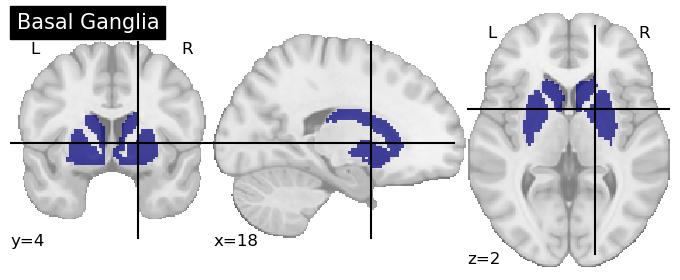

In [25]:
# ROI mask from atlas
brain_roi = image.math_img('img*0', img = master_atlas)
for index in set_label:
    brain_roi = image.math_img('np.logical_or(img0, img1 == %s)' %(index), img0 = brain_roi, img1 = master_atlas) # ROI mask from atlas

plotting.plot_roi(brain_roi,title='Basal Ganglia')

In [26]:
# save brain mask
output_name = os.path.join(base_dir,'analysis','Masks', 'BN_2mm_basalganglia_mask_.nii.gz' )
nib.save(brain_roi, output_name)

## Thalamus

In [28]:
# get index of hippocampus (cHipp_R, rHipp_R, cHipp_L, rHipp_L)

set_label = master_label[(master_label['region'] == 'mPFtha_L') | 
                         (master_label['region'] == 'mPFtha_R') |
                         (master_label['region'] == 'mPMtha_L') | 
                         (master_label['region'] == 'mPMtha_R') |
                         (master_label['region'] == 'Stha_L') | 
                         (master_label['region'] == 'Stha_R') |
                         (master_label['region'] == 'rTtha_L') | 
                         (master_label['region'] == 'rTtha_R') |
                         (master_label['region'] == 'PPtha_L') | 
                         (master_label['region'] == 'PPtha_R') |
                         (master_label['region'] == 'Otha_L') | 
                         (master_label['region'] == 'Otha_R') |
                         (master_label['region'] == 'cTtha_L') | 
                         (master_label['region'] == 'cTtha_R') |
                         (master_label['region'] == 'IPFtha_L') |
                         (master_label['region'] == 'IPFtha_R')].index 
set_label

Int64Index([231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
            244],
           dtype='int64')

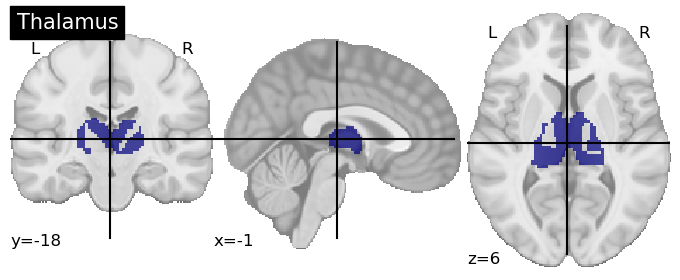

In [29]:
# ROI mask from atlas
brain_roi = image.math_img('img*0', img = master_atlas)
for index in set_label:
    brain_roi = image.math_img('np.logical_or(img0, img1 == %s)' %(index), img0 = brain_roi, img1 = master_atlas) # ROI mask from atlas

plotting.plot_roi(brain_roi,title='Thalamus')

In [30]:
# save brain mask
output_name = os.path.join(base_dir,'analysis','Masks', 'BN_2mm_thalamus_mask_.nii.gz' )
nib.save(brain_roi, output_name)